<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section6)<br>
7. [**Building a model**](#Section7)<br>
8. [**Summarization**](#Section8)</br>
  8.1 [**Conclusion**](#Section81)</br>
  8.2 [**Actionable Insights**](#Section82)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

Company Introduction

Our client for this project is a major Concrete Producer.

- Their concrete stands out to be one of the best in the business and holds a contract with five of the most well known real estate companies.
- Recently, they have developed a new kind of concrete which requires less water and is stronger and better than the concrete they used to sell.
- They have few competitors who are also developing new kinds of concrete to launch in the market to get more clients.

Current Scenario

- The regular price of concrete per cubic yard is around USD100 to USD200 but due to market inflation the current price has gone down and the company is at loss.
- The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale..

---
<a name = Section2></a>
# **2. Problem Statement**
---
This section is emphasised on providing some generic introduction to the problem that most companies confronts.



**Problem Statement:**



- The current process suffers from the following problems:

- The company is under a time crunch to test the compressive strength of the concrete to release in the market.
- Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.

- The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used..


Your Role

- You are given a dataset containing materials used in the concrete.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
#!pip install -q datascience                                         # Package that is required by pandas profiling
#!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
#from pandasprofiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.



|Id|Feature|Description|
|:--|:--|:--|
|01|Id| Unique identity of each observation| 
|02|cement| Quantity of cement in the mixture in kg(kilogram).| 
|03|slag| Quantity of cement in the mixture in kg(kilogram).| 
|04|Flyash| Quantity of fly ash in the mixture in kg(kilogram).|
|05|water| Quantity of water in the mixture in kg(kilogram).|
|06|superplasticizer| Quantity of superplasticizer in the mixture in kg(kilogram).|
|07|coarseaggregate| Quantity of coarse aggregate in the mixture in kg(kilogram).|
|08|fineaggregate| Quantity of fine aggregate in the mixture in kg(kilogram).| 
|09|age| Age of the mixture in days.| 
|10|csMPa| compressive strength of concrete in MPa(dependent variable).|

In [2]:
#Loading dataset containing CSV file

train_dataset = pd.read_csv('C:/Users/DELL/Downloads/ML 3 Project - Regression-Concrete-Compressive-Strength-Prediction/concrete_train.csv')


In [3]:
train_dataset.head(10)

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
3,848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
4,294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40
5,286,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,28,27.77
6,938,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
7,447,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,56,48.59
8,692,212.0,141.3,0.0,203.5,0.0,973.4,750.0,90,39.70
9,652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57


In [4]:
train_dataset['csMPa'].max()

82.6

In [52]:
train_dataset['age'].min()

1

In [5]:
train_dataset['Id'].nunique()

824

In [6]:
train_dataset.shape

(824, 10)

### **Data Description**

- To get some quick description out of the data we can use describe method defined in pandas library.

In [7]:
train_dataset.describe()                                       

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### **Data Information**

In [8]:
train_dataset.info()                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [9]:
train_dataset.isnull().sum()

Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [10]:
train_dataset.columns

Index(['Id', 'cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

**Observation:**
- There are no missing values in the dataset.
- There are 10 variables with numeric values.
- There are 824 records with 10 columns in the dataset.
- Id is the unique variable.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [49]:
# profile = ProfileReport(df = data)
# profile.to_file(outputfile = 'Pre Profiling Report.html')
# print('Accomplished!')

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.


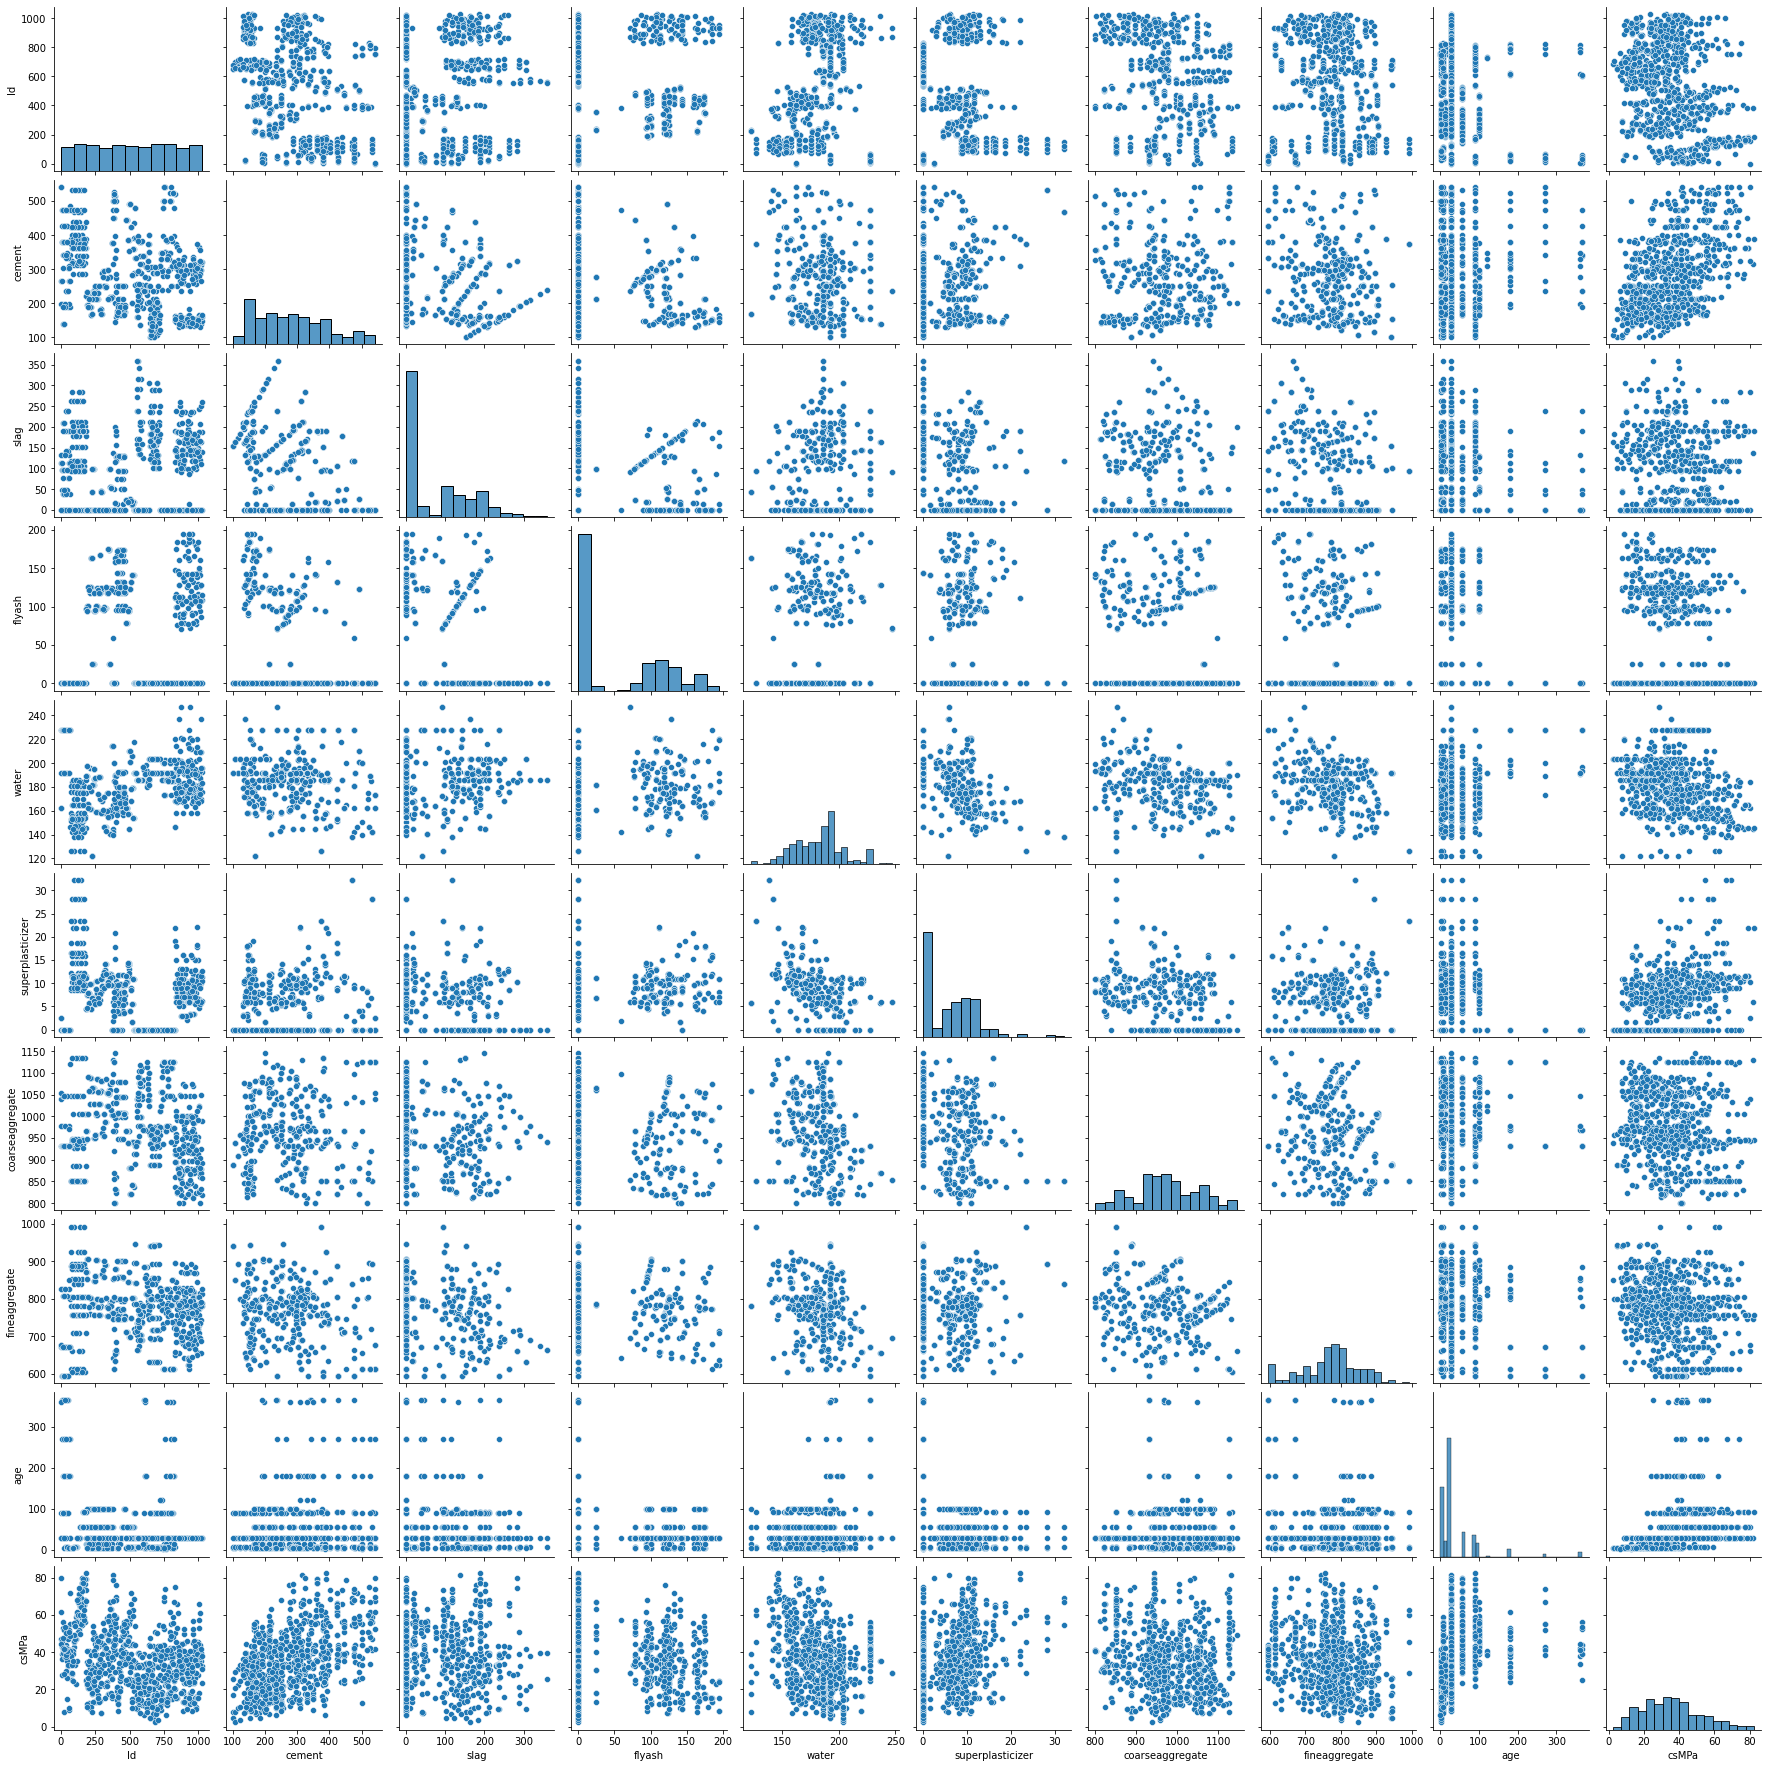

In [11]:
#Understanding the entire train data using a pair plot
sns.pairplot(train_dataset)

**What is the relation between cement and csMPa?**

Text(0.5, 0, 'cement')

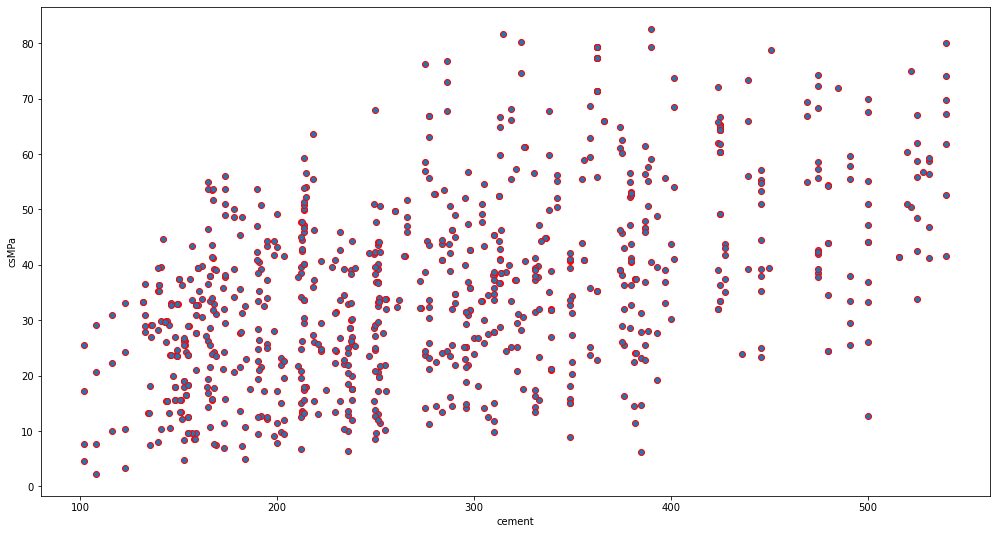

In [12]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='cement',edgecolors='red',data=train_dataset)
plt.ylabel('csMPa')
plt.xlabel('cement')

- Here x-axis contains the cement data points which may vary from 100 to 500, and the y-axis presents the dependent variable csMPa where its data point vary from 0 to 80.

- As we increase the amount of cement in the concrete then, the quality of concrete may also increase as shown in the scatter plot.

**What is the relation between flyash and csMPa?**

Text(0.5, 0, 'flyash')

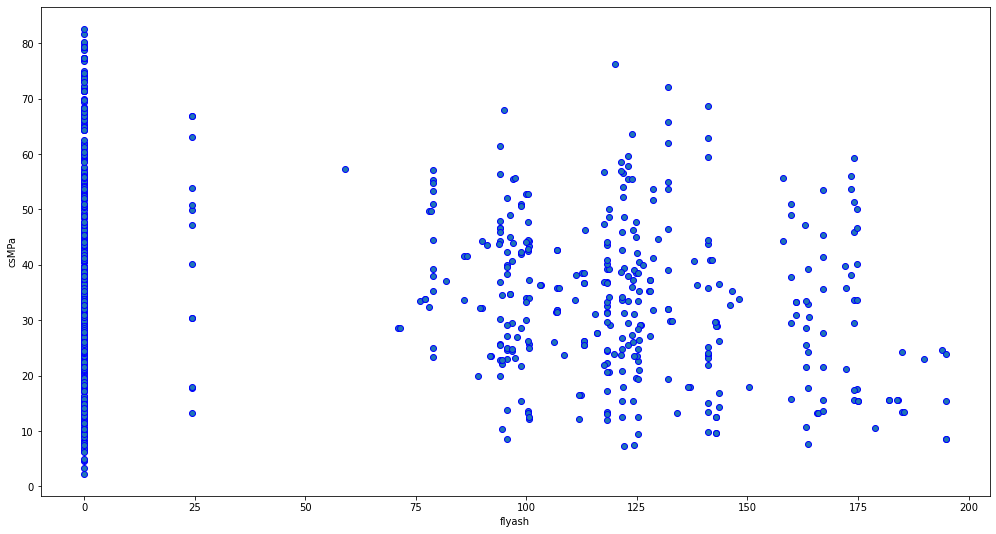

In [50]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='flyash',edgecolors='blue',data=train_dataset)
plt.ylabel('csMPa')
plt.xlabel('flyash')

Increase in the flyash does not effect the csMPa

**What is the co-relation between all variables?**

<AxesSubplot:>

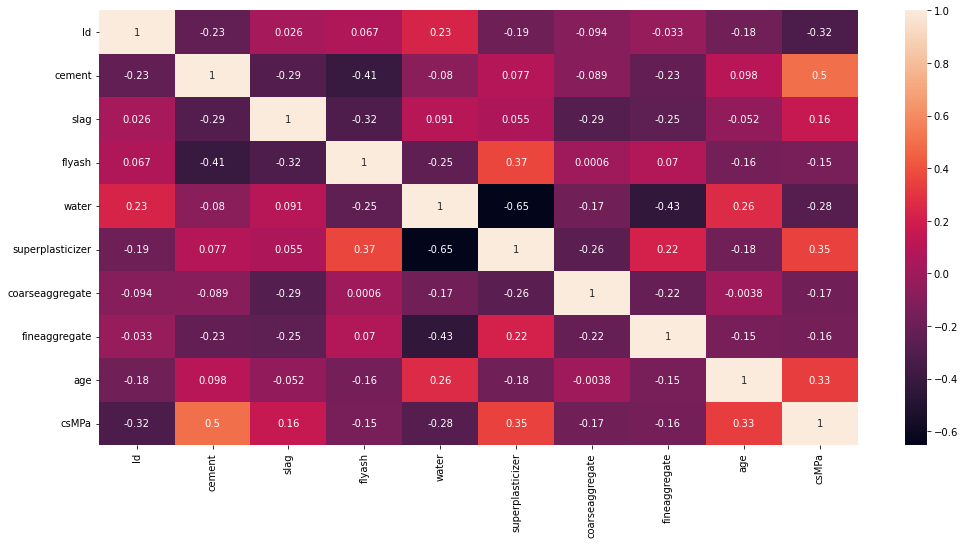

In [14]:
#importing seaborn
import seaborn as sb

plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(train_dataset.corr(),annot=True)

Cement and csMPa have the highest correlation followed by Superplasticizer and flyash.

**Are there any outliers in data?**

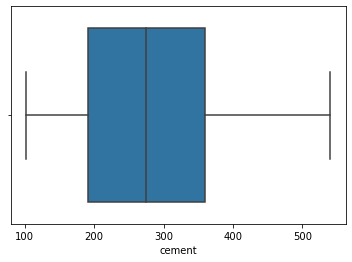

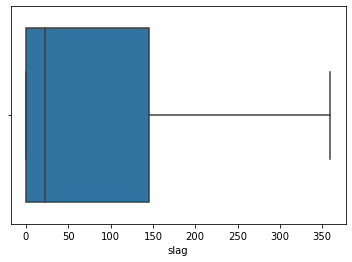

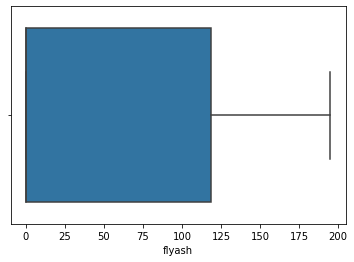

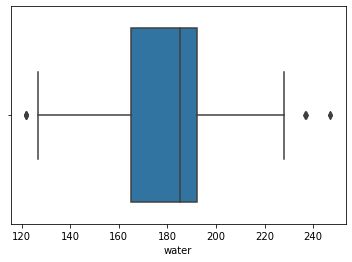

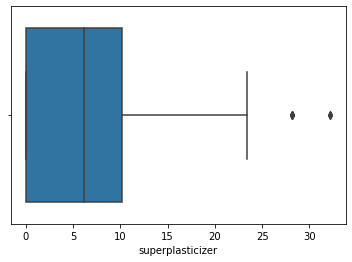

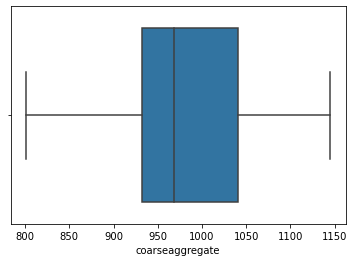

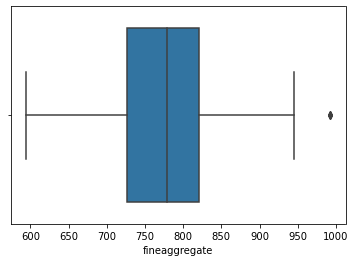

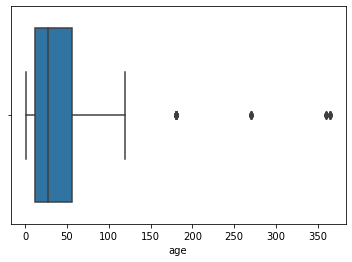

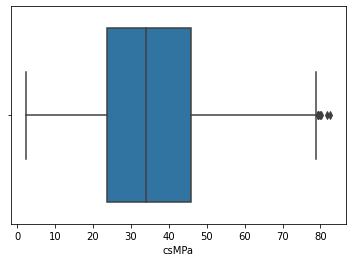

In [15]:
l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
for i in l:
    sb.boxplot(x=train_dataset[i])
    plt.show()

We can see that there are outliers in water, superplasticizer, fineaggregate, age, and csMPa.

---
<a name = Section7></a>
# **7. Building a Model**

**Since the target variable is continous, we will apply linear regression**

In [18]:
#Splitting the train data set into training and testing.

X = train_dataset.drop(columns = "csMPa", axis = 1)
y = train_dataset["csMPa"]

 - **Splitting 80/20 ratio**

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(824, 9) (659, 9) (165, 9)


In [21]:
#Using Linear Regression
lr = LinearRegression()


In [22]:
lr.fit(X_train, y_train) 

LinearRegression()

In [23]:
# Prediction on training data
train_dataset_predict1 = lr.predict(X_train)

In [25]:
#Prediction on testing data
test_dataset_predict1 = lr.predict(X_test)

In [26]:
#Finding the R2
r2_test = metrics.r2_score(y_test,test_dataset_predict1)
print("R Squared Value:", format(r2_test,".4f"))

R Squared Value: 0.6005


In [27]:
from sklearn import metrics
print('LR Train MAE:', format(metrics.mean_absolute_error(y_train, train_dataset_predict1),".4f"))
print('LR Train MSE:', format(metrics.mean_squared_error(y_train, train_dataset_predict1),".4f"))
print('LR Train RMSE:', format(np.sqrt(metrics.mean_squared_error(y_train, train_dataset_predict1)),".4f"))

LR Train MAE: 8.1917
LR Train MSE: 110.5875
LR Train RMSE: 10.5161


In [28]:
print('LR Test MAE:', format(metrics.mean_absolute_error(y_test, test_dataset_predict1),".4f"))
print('LR Test MSE:', format(metrics.mean_squared_error(y_test, test_dataset_predict1),".4f"))
print('LR Test RMSE:', format(np.sqrt(metrics.mean_squared_error(y_test, test_dataset_predict1)),".4f"))

LR Test MAE: 8.6382
LR Test MSE: 112.2269
LR Test RMSE: 10.5937


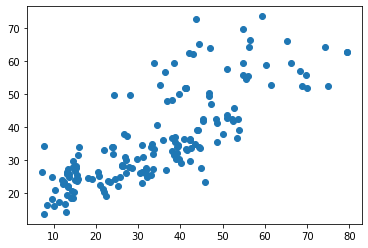

In [29]:
plt.scatter(x=y_test,y=test_dataset_predict1)

**As we can see that there is no straight line so it is not a best model we can apply on our data.**

**2. Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
test_dataset_predict_dt=dt.predict(X_test)

In [31]:
train_dataset_predict_dt = dt.predict(X_train)

In [32]:
test_dataset_predict_dt.shape


(165,)

In [33]:
train_dataset_predict_dt.shape

(659,)

Text(0, 0.5, 'DT Predicted Y')

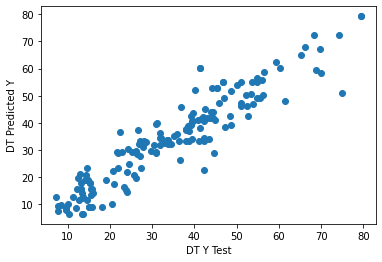

In [34]:
plt.scatter(x=y_test,y=test_dataset_predict_dt)
plt.xlabel('DT Y Test')
plt.ylabel('DT Predicted Y')

In [35]:
#Checking RMSE for Decision tree Algorithm
#For testing data
print('DT Test MAE:', format(metrics.mean_absolute_error(y_test, test_dataset_predict_dt),".4f"))
print('DT Test MSE:', format(metrics.mean_squared_error(y_test, test_dataset_predict_dt),".4f"))
print('DT Test RMSE:', format(np.sqrt(metrics.mean_squared_error(y_test, test_dataset_predict_dt)),".4f"))

DT Test MAE: 4.3474
DT Test MSE: 36.9441
DT Test RMSE: 6.0782


In [36]:
#For training data
print('DT Train MAE:', (metrics.mean_absolute_error(y_train, train_dataset_predict_dt)))
print('DT Train MSE:', (metrics.mean_squared_error(y_train, train_dataset_predict_dt)))
print('DT Train RMSE:', (np.sqrt(metrics.mean_squared_error(y_train, train_dataset_predict_dt))))

DT Train MAE: 0.0
DT Train MSE: 0.0
DT Train RMSE: 0.0


**3. Random forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
test_data_predict_rf=rf.predict(X_test)

In [38]:
train_data_predict_rf=rf.predict(X_train)

In [39]:
print('RF Test MAE:', format(metrics.mean_absolute_error(y_test, test_data_predict_rf),".4f"))
print('RF Test MSE:', format(metrics.mean_squared_error(y_test, test_data_predict_rf),".4f"))
print('RF Test RMSE:', format(np.sqrt(metrics.mean_squared_error(y_test, test_data_predict_rf)),".4f"))

RF Test MAE: 3.4433
RF Test MSE: 24.5350
RF Test RMSE: 4.9533


In [40]:
print('RF Train MAE:', format(metrics.mean_absolute_error(y_train, train_data_predict_rf),".4f"))
print('RF Train MSE:', format(metrics.mean_squared_error(y_train, train_data_predict_rf),".4f"))
print('RF Train RMSE:', format(np.sqrt(metrics.mean_squared_error(y_train, train_data_predict_rf)),".4f"))

RF Train MAE: 1.4122
RF Train MSE: 3.8807
RF Train RMSE: 1.9699


<AxesSubplot:xlabel='csMPa', ylabel='Density'>

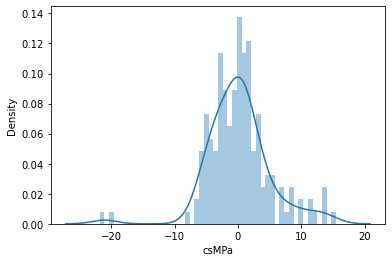

In [41]:
sns.distplot((y_test-test_data_predict_rf),bins=50)


<AxesSubplot:xlabel='csMPa', ylabel='Density'>

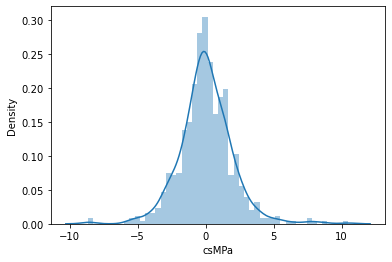

In [42]:
sns.distplot((y_train-train_data_predict_rf),bins=50)


Text(0, 0.5, 'RF Predicted Y')

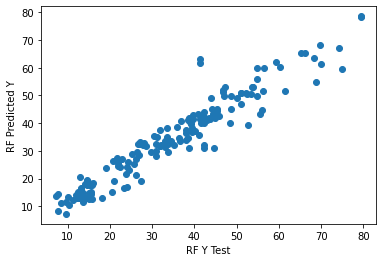

In [43]:
plt.scatter(x=y_test,y=test_data_predict_rf)
plt.xlabel('RF Y Test')
plt.ylabel('RF Predicted Y')

In [44]:
test_dataset = pd.read_csv('C:/Users/DELL/Downloads/ML 3 Project - Regression-Concrete-Compressive-Strength-Prediction/concrete_test.csv')
test_dataset

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...,...
201,482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
202,545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
203,110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
204,514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [45]:
test_dataset_final = test_dataset 

In [46]:
test_dataset_final

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...,...
201,482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
202,545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
203,110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
204,514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [47]:
prediction = rf.predict(test_dataset_final)

In [48]:
res = pd.DataFrame(prediction)
res.index = test_dataset_final.index
res.index = test_dataset_final['Id']
res.columns = ["csMPa"]
res.to_csv("Concrete_Compressive_Strength_Prediction_kuldipgusani99@gmail.com.csv", index = True, header = False)

---
<a name = Section8></a>
# **8. Summarization**
---

<a name = Section81></a>
### **8.1 Conclusion**

 - We studied in breifly about the data, its characteristics and its distribution.

 - We investigated about the correlation between different features of the dataset.
 
 - The prediction is done based on RMSE value as required.


<a name = Section82></a>
### **8.2 Actionable Insight**

 - Since the data here is continous we used 3 models. 1) Linear Regression model, 2) Decision Tree and 3) Random Forest for this dataset. We found that the Random forest is the best fit model for this dataset.